In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
% matplotlib inline

UsageError: Line magic function `%` not found.


## EDA

Loading the dataset

In [22]:
dataset = pd.read_csv(Path.cwd().parent.joinpath("data", "cleaned_data.csv"))
dataset.head()

,year,month,var,value
0,1994,1,imae,40.822017
1,1994,2,imae,38.455042
2,1994,3,imae,40.086588
3,1994,4,imae,37.066490
4,1994,5,imae,38.398198


 We transform it to wide format

In [23]:
dataset_wide = pd.pivot(dataset, index=["year", "month"], columns='var', values='value').reset_index()
dataset_wide.loc[:, "date"] = dataset_wide.loc[:, "year"].astype(str) + "-" + dataset_wide.loc[:, "month"].astype(str)
dataset_wide.loc[:, "date"] = pd.to_datetime(dataset_wide.loc[:, "date"] )
dataset_wide.head()

var,year,month,chn_m,chn_x,crude_oil_brent,crude_oil_wti,exp,gas_henry_hub,gold,imae,...,treasury3month,treasury4week,treasury6month,ue_m,ue_x,usa_m,usa_x,usdollar_euro,yuan_dollar_spot_tc,date
0,1994,1,7.179652e+09,6.574410e+09,14.291500,15.026667,189.281352,NaN,NaN,40.822017,...,2.975500,NaN,3.154000,4.541210e+10,4.762048e+10,61365.0,55159.0,NaN,8.721905,1994-01-01
1,1994,2,8.419345e+09,7.638377e+09,13.802000,14.781053,225.793494,NaN,NaN,38.455042,...,3.253684,NaN,3.425789,4.607636e+10,4.814740e+10,62974.0,53729.0,NaN,8.724868,1994-02-01
2,1994,3,9.055518e+09,8.647451e+09,13.822609,14.680870,248.563429,NaN,NaN,40.086588,...,3.503043,NaN,3.781304,4.764191e+10,4.983399e+10,64772.0,58307.0,NaN,8.724135,1994-03-01
3,1994,4,9.886745e+09,9.298384e+09,15.231579,16.420000,249.064969,NaN,NaN,37.066490,...,3.678421,NaN,4.091053,4.800747e+10,5.001755e+10,64323.0,56436.0,NaN,8.725079,1994-04-01
4,1994,5,9.410489e+09,9.548869e+09,16.188000,17.889048,243.347408,NaN,NaN,38.398198,...,4.144762,NaN,4.598095,4.925357e+10,5.194565e+10,65070.0,57342.0,NaN,8.685910,1994-05-01


The shape

In [24]:
dataset_wide.shape

(347, 29)

### plots

First the exports and imports flows. We can see to moments with a big drop, the recession and the covid

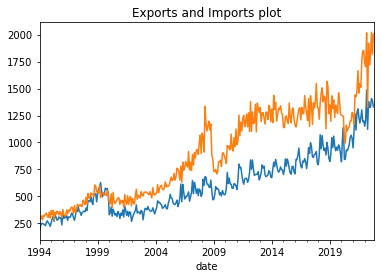

In [25]:
plt.title("Exports and Imports plot")
dataset_wide.set_index("date")["exp"].plot()
dataset_wide.set_index("date")["imp"].plot()
plt.show()

Now USA's X and M

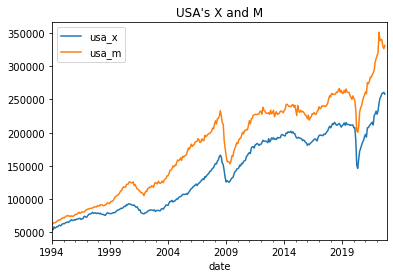

In [26]:
plt.title("USA's X and M")
dataset_wide.set_index("date")["usa_x"].plot()
dataset_wide.set_index("date")["usa_m"].plot()
plt.legend(loc="upper left")
plt.show()

China's X - M

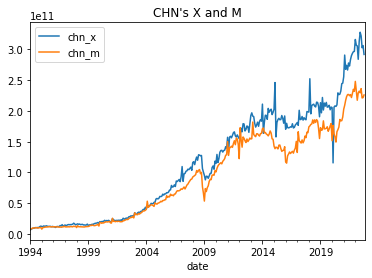

In [27]:
plt.title("CHN's X and M")
dataset_wide.set_index("date")["chn_x"].plot()
dataset_wide.set_index("date")["chn_m"].plot()
plt.legend(loc="upper left")
plt.show()

UE's X and M

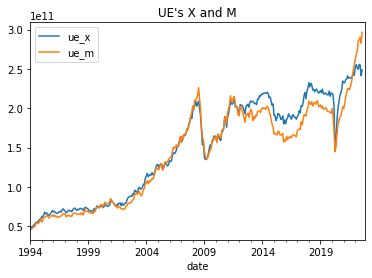

In [28]:
plt.title("UE's X and M")
dataset_wide.set_index("date")["ue_x"].plot()
dataset_wide.set_index("date")["ue_m"].plot()
plt.legend(loc="upper left")
plt.show()

The gasoline and oil vars

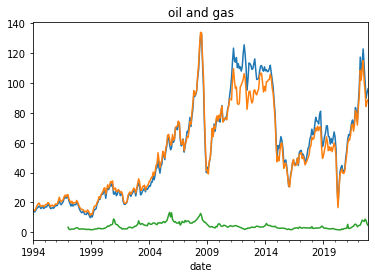

In [29]:
plt.title("oil and gas")
dataset_wide.set_index("date")["crude_oil_brent"].plot()
dataset_wide.set_index("date")["crude_oil_wti"].plot()
dataset_wide.set_index("date")["gas_henry_hub"].plot()
plt.show()

treasure variables

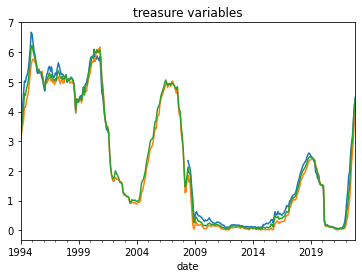

In [30]:
plt.title("treasure variables")
dataset_wide.set_index("date")["treasury1year"].plot()
dataset_wide.set_index("date")["treasury3month"].plot()
dataset_wide.set_index("date")["treasury6month"].plot()
plt.show()

As they are, basically, equals we select only the 3 month frecuency. Now we check local TC with US

<AxesSubplot:xlabel='date'>

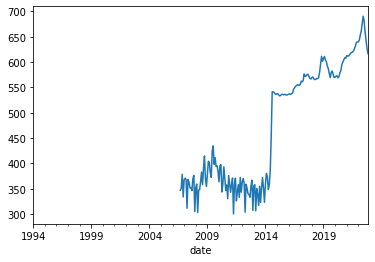

In [31]:
dataset_wide.set_index("date")["tc_buy"].plot()

Let check for the Nans

In [32]:
dataset_wide.isna().sum()

var
year                        0
month                       0
chn_m                       1
chn_x                       1
crude_oil_brent             0
crude_oil_wti               0
exp                         1
gas_henry_hub              36
gold                      128
imae                        2
imp                         1
mil_count                 187
monex_amount_mean         167
nominal_broad_usdollar    144
tc_buy                    152
tc_monex                  167
tc_sell                   151
tpm                       146
treasury1year              79
treasury3month              0
treasury4week              90
treasury6month              0
ue_m                        3
ue_x                        3
usa_m                       2
usa_x                       2
usdollar_euro              60
yuan_dollar_spot_tc         0
date                        0
dtype: int64

The last two months of exp are nan

In [33]:
dataset_wide.set_index("date").loc[:, ["exp"]].isna()

var,exp
date,
1994-01-01,False
1994-02-01,False
1994-03-01,False
1994-04-01,False
1994-05-01,False
...,...
2022-07-01,False
2022-08-01,False
2022-09-01,False


We create our finally dataset in wide format, with the log of exp as the first column

In [34]:
final_dataset = dataset_wide.loc[:, ["date", "exp", "imp", "imae", 
                                     "crude_oil_brent", "gas_henry_hub", "treasury3month",
                                     "yuan_dollar_spot_tc", "usdollar_euro",
                                     "ue_m", "ue_x", "usa_x", "usa_m", "chn_x", "chn_m",
                                     "year", "month"]]
final_dataset

var,date,exp,imp,imae,crude_oil_brent,gas_henry_hub,treasury3month,yuan_dollar_spot_tc,usdollar_euro,ue_m,ue_x,usa_x,usa_m,chn_x,chn_m,year,month
0,1994-01-01,189.281352,295.813278,40.822017,14.291500,NaN,2.975500,8.721905,NaN,4.541210e+10,4.762048e+10,55159.0,61365.0,6.574410e+09,7.179652e+09,1994,1
1,1994-02-01,225.793494,292.973883,38.455042,13.802000,NaN,3.253684,8.724868,NaN,4.607636e+10,4.814740e+10,53729.0,62974.0,7.638377e+09,8.419345e+09,1994,2
2,1994-03-01,248.563429,318.044890,40.086588,13.822609,NaN,3.503043,8.724135,NaN,4.764191e+10,4.983399e+10,58307.0,64772.0,8.647451e+09,9.055518e+09,1994,3
3,1994-04-01,249.064969,282.951854,37.066490,15.231579,NaN,3.678421,8.725079,NaN,4.800747e+10,5.001755e+10,56436.0,64323.0,9.298384e+09,9.886745e+09,1994,4
4,1994-05-01,243.347408,324.867854,38.398198,16.188000,NaN,4.144762,8.685910,NaN,4.925357e+10,5.194565e+10,57342.0,65070.0,9.548869e+09,9.410489e+09,1994,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,2022-07-01,1328.249795,1804.493578,110.063999,111.925714,7.284500,2.232500,6.735155,1.016825,2.827161e+11,2.415047e+11,259585.0,330040.0,3.220420e+11,2.363655e+11,2022,7
343,2022-08-01,1407.074745,2022.162231,110.343499,100.446364,8.805652,2.630870,6.800678,1.012878,2.966727e+11,2.487559e+11,260793.0,326472.0,3.028645e+11,2.212203e+11,2022,8
344,2022-09-01,1387.371466,1819.839119,110.481321,89.764762,7.880476,3.126667,7.019514,0.989881,NaN,NaN,258004.0,331287.0,3.063312e+11,2.217532e+11,2022,9
345,2022-10-01,1330.733207,2005.776559,NaN,93.331905,5.660500,3.717000,7.190185,0.985295,NaN,NaN,NaN,NaN,2.919971e+11,2.260405e+11,2022,10


we split the data into log form for exp and imp

In [35]:
final_dataset1 = final_dataset

In [36]:
final_dataset2 = final_dataset.assign(exp=lambda x: np.log(x["exp"]),
                                      imp=lambda x: np.log(x["imp"]))

We save both

In [37]:
with Path.cwd().parent.joinpath("input", "data4x_norm.csv") as e:
    final_dataset1.to_csv(e, index=False)
with Path.cwd().parent.joinpath("input", "data4x_log.csv") as e:
    final_dataset2.to_csv(e, index=False)

In [38]:
(1991-2022)*-1 * 12

372